###### Importing the libraries and reading the data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset= pd.read_excel("Visualization worksheet.xlsx",header=1)

In [3]:
dataset=dataset.replace(np.nan,0)
dataset.head()

,Unnamed: 0,Papers,Permissions,Leaks,Code Verification,Vulnerability,Cryptography,Energy,App Cloning,Test case generation,Malware Detection
0,Static,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Ques- Which static analysis papers use "Energy" as a feature?

The following graph is representing the paper numbers which use "Energy" as a feature. As we can observe that in static analysis paper number 40, 41, 55, 62, 78 and 83 use this feature. A scatter plot is used to represent the papers. 0 reprents the papers which have not used "Energy" feature whereas 1 represents the papers which have used the same. 

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
df_static= dataset[0:84]
sns.set(rc={'figure.figsize':(22,6)})
ax = sns.scatterplot(x= df_static['Papers'], y= df_static['Energy'], color="green")
n=[]
for i in range(1,85):
    n.append(i)
txt=1
for i, txt in enumerate(n):
    if (df_static['Energy'][i]==1):
        ax.annotate(txt, (df_static['Papers'][i], df_static['Energy'][i]))
    txt=txt+1

### Ques- In what proportion have papers used "Permissions" feature for static, dynamic, hybrid and ML analysis? 
##### 1: have used 0:have not used

The violin plots and strip plots are used to compare the proportion of papers that use "Permissions" feature into consideration in static, dynamic, hybrid, ML analysis respectively. As can be observed in ML analysis, the permissions is used in only 1 paper whereas in static analysis there are comparitively more papers that have used this feature.

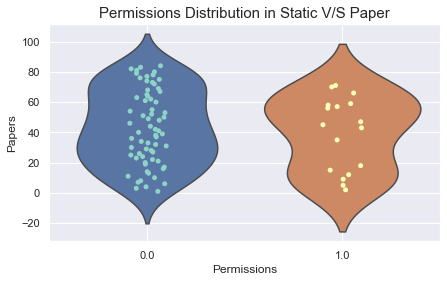

In [5]:
sns.set(rc={'figure.figsize':(7,4)})
fig1= sns.violinplot(x= df_static['Permissions'],y= df_static['Papers'],inner=None)
fig1 = sns.stripplot(x= df_static['Permissions'],y= df_static['Papers'],palette="Set3")
plt.title("Permissions Distribution in Static V/S Paper",fontsize=15)
plt.grid(True)
plt.show(fig1)

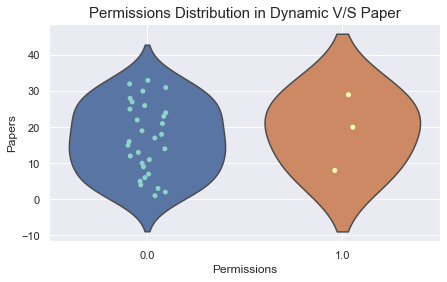

In [6]:
df_dynamic= dataset[85:118]
sns.set(rc={'figure.figsize':(7,4)})
fig1= sns.violinplot(x= df_dynamic['Permissions'],y= df_dynamic['Papers'],inner=None)
fig1 = sns.stripplot(x= df_dynamic['Permissions'],y= df_dynamic['Papers'],palette="Set3")
plt.title("Permissions Distribution in Dynamic V/S Paper",fontsize=15)
plt.grid(True)
plt.show(fig1)

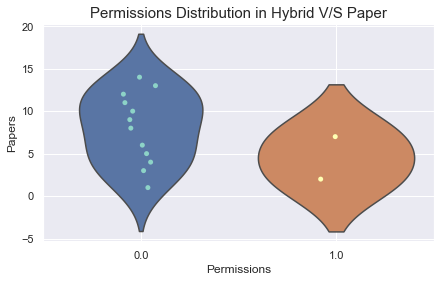

In [7]:
df_hybrid= dataset[119:133]
sns.set(rc={'figure.figsize':(7,4)})
fig1= sns.violinplot(x= df_hybrid['Permissions'],y= df_hybrid['Papers'],inner=None)
fig1 = sns.stripplot(x= df_hybrid['Permissions'],y= df_hybrid['Papers'],palette="Set3")
plt.title("Permissions Distribution in Hybrid V/S Paper",fontsize=15)
plt.grid(True)
plt.show(fig1)

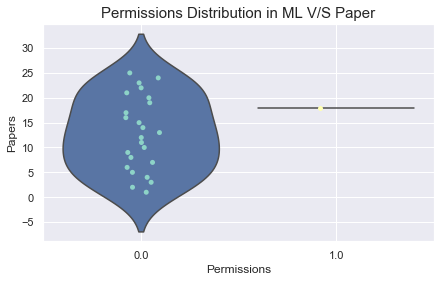

In [8]:
df_ML= dataset[134:-1]
sns.set(rc={'figure.figsize':(7,4)})
fig1= sns.violinplot(x= df_ML['Permissions'],y= df_ML['Papers'],inner=None)
fig1 = sns.stripplot(x= df_ML['Permissions'],y= df_ML['Papers'],palette="Set3")
plt.title("Permissions Distribution in ML V/S Paper",fontsize=15)
plt.grid(True)
plt.show(fig1)

### Ques- Which features are related to each other? Which features come together in most of the static analysis?

A correlation matrix is a table showing correlation coefficients between sets of variables. The relation between the features can be compared from the confusion matrix. If the correlation coefficient is nearer to 0, implies the features are less related to each other and the coefficient value near to 1 means the features are highly correlated. For static analysis, from the values in the confusion matrix, it can be observed that there is not too much relation between the features. There is slight relation between Permissions and Code Verification. 

In [9]:
df_1=  df_static[df_static.columns[2:]]
df_1
correlation =  df_1.corr()
correlation

,Permissions,Leaks,Code Verification,Vulnerability,Cryptography,Energy,App Cloning,Test case generation,Malware Detection
Permissions,1.000000,-0.029630,0.115687,0.008161,-0.096940,-0.139706,-0.112635,-0.139706,NaN
Leaks,-0.029630,1.000000,-0.156174,-0.275431,-0.192450,-0.092450,-0.223607,-0.092450,NaN
Code Verification,0.115687,-0.156174,1.000000,-0.113403,-0.030056,-0.043315,-0.034922,-0.043315,NaN
Vulnerability,0.008161,-0.275431,-0.113403,1.000000,-0.004819,-0.104169,-0.162369,-0.201394,NaN
Cryptography,-0.096940,-0.192450,-0.030056,-0.004819,1.000000,-0.053376,-0.043033,-0.053376,NaN
Energy,-0.139706,-0.092450,-0.043315,-0.104169,-0.053376,1.000000,-0.062017,0.102564,NaN
App Cloning,-0.112635,-0.223607,-0.034922,-0.162369,-0.043033,-0.062017,1.000000,-0.062017,NaN
Test case generation,-0.139706,-0.092450,-0.043315,-0.201394,-0.053376,0.102564,-0.062017,1.000000,NaN
Malware Detection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


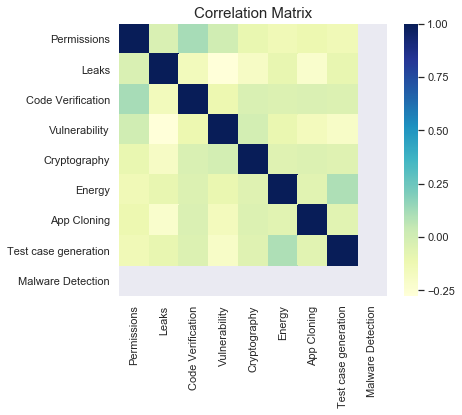

In [10]:
plt.figure(figsize=(6,5))
plt.title("Correlation Matrix",fontsize=15)
sns.heatmap(correlation,cmap="YlGnBu")
plt.show()

#### Ques- What is the distribution of Permissions, Leaks and Vulnerability in static, dynamic, hybrid and ML analysis?

In the 2 graphs below, Permissions, Leaks and Vulnerablity for static, dynamic, hybrid and ML analysis is shown. The total permissions, leaks, vulnerability are stored in a list for all the analysis types. This list is then plotted V/S Analysis Type in the form of bar graph and line graph.

In [11]:
total_static= dataset.iloc[84,2:]
total_dynamic= dataset.iloc[118,2:]
total_hybrid= dataset.iloc[133,2:]
total_ml=dataset.iloc[159,2:]

In [12]:
permissions=[]
permissions.append(total_static['Permissions'])
permissions.append(total_dynamic['Permissions'])
permissions.append(total_hybrid['Permissions'])
permissions.append(total_ml['Permissions'])

leaks=[]
leaks.append(total_static['Leaks'])
leaks.append(total_dynamic['Leaks'])
leaks.append(total_hybrid['Leaks'])
leaks.append(total_ml['Leaks'])

vulnerability=[]
vulnerability.append(total_static['Vulnerability'])
vulnerability.append(total_dynamic['Vulnerability'])
vulnerability.append(total_hybrid['Vulnerability'])
vulnerability.append(total_ml['Vulnerability'])

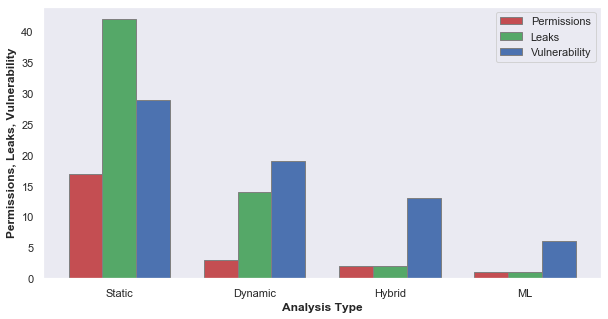

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.axes as axes
import matplotlib
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(10, 5)) 
     
# Set position of bar on X axis 
br1 = np.arange(len(permissions)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4=  [x + barWidth for x in br3]  

# Make the plot 
plt.bar(br1, permissions, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Permissions') 
plt.bar(br2, leaks, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Leaks') 
plt.bar(br3, vulnerability, color ='b', width = barWidth, 
         edgecolor ='grey', label ='Vulnerability') 
plt.legend(loc='best')
# Adding Xticks  
plt.xlabel('Analysis Type', fontweight ='bold') 
plt.ylabel('Permissions, Leaks, Vulnerability', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(permissions))], 
            ['Static','Dynamic','Hybrid','ML']) 
plt.grid(False)
plt.show()

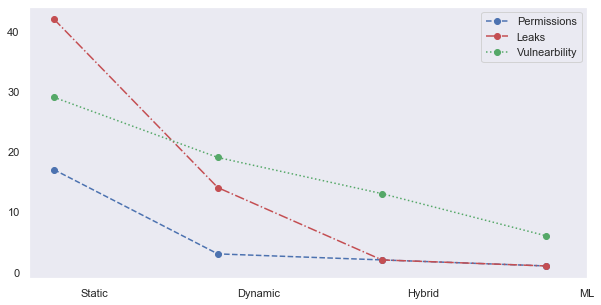

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.axes as axes
import matplotlib
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(10, 5)) 

matplotlib.pyplot.plot(permissions,linestyle='--', marker='o', color='b',label ='Permissions')
matplotlib.pyplot.plot(leaks,linestyle='-.', marker='o',color='r',label ='Leaks')
matplotlib.pyplot.plot(vulnerability, linestyle=':', marker='o',color='g',label ='Vulnearbility')

plt.xticks([r + barWidth for r in range(len(permissions))], 
            ['Static','Dynamic','Hybrid','ML']) 
plt.legend(loc='best')
plt.grid(False)
plt.show()

#### Ques-Which features is being most used in all the static, dynamic, hybrid and ML analysis?

Total of all the features corresponding to the analysis type are plotted in the curve below. The bar graph represntation is used to visualize it. The graph depicts that a particular feature is used most by which analysis.<br>
Permissions- Static Analysis <br>
Leaks- Static Analysis <br>
Code Verification- Static Analysis <br>
Vulnerability- Static Analysis <br>
Cryptography- Static Analysis <br>
Energy- Static Analysis <br>
App Cloning- Static Analysis <br>
Test case generation- Static Analysis <br>
Malware Detection- ML Analysis<br>

In [15]:
total_static1= list(total_static)
total_dynamic1= list(total_dynamic)
total_hybrid1= list(total_hybrid)
total_ml1= list(total_ml)

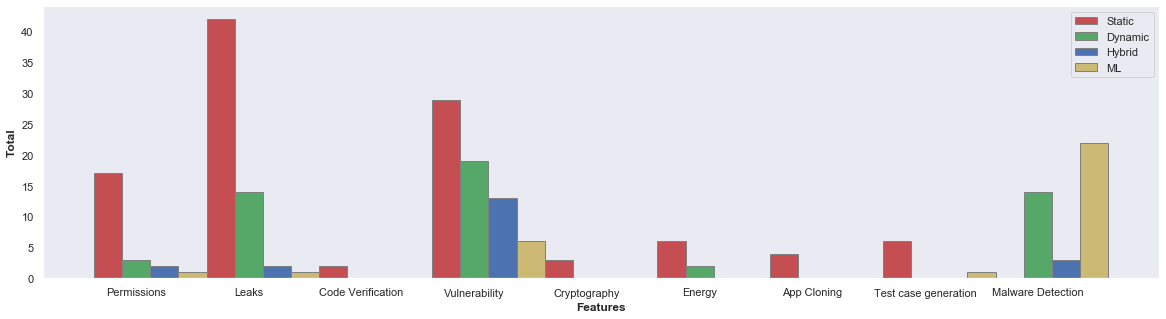

In [16]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.axes as axes
import matplotlib
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(20, 5)) 
     
# Set position of bar on X axis 
br1 = np.arange(len(total_static1)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4=  [x + barWidth for x in br3]  

# Make the plot 
plt.bar(br1, total_static1, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Static') 
plt.bar(br2, total_dynamic1, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Dynamic') 
plt.bar(br3, total_hybrid1, color ='b', width = barWidth, 
         edgecolor ='grey', label ='Hybrid') 
plt.bar(br4, total_ml1, color ='y', width = barWidth, 
         edgecolor ='grey', label ='ML') 

plt.legend(loc='best')
# Adding Xticks  
plt.xlabel('Features', fontweight ='bold') 
plt.ylabel('Total', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(total_static1))], 
            ['Permissions','Leaks','Code Verification','Vulnerability','Cryptography','Energy','App Cloning','Test case generation','Malware Detection']) 
plt.grid(False)
plt.show()